## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata)
study_results_df = pd.read_csv(study_results)

In [2]:
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Combine the data into a single dataset
combined_data_df=pd.merge(mouse_metadata_df, study_results_df, how='outer', on='Mouse ID')
combined_data_df.head(25)

# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
combined_data_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [5]:
combined_data_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [6]:
combined_data_df.to_csv("fileOne.csv", index=False, header=True)

In [7]:
# Checking the number of mice.
combined_data_df.nunique()


Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined_data_df[["Mouse ID", "Timepoint"]].head()

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20


In [9]:
# Generate a pie plot showing the distribution of female versus male mice using Panda
combined_data_df.count()

# Labels for the sections of our pie chart
#labels = ["Female", "Male"]

# The values of each section of the pie chart
#sizes = []

# The colors of each section of the pie chart
#colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
#explode = (0.1, 0, 0, 0)  In [4]:  # Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        #autopct="%1.1f%%", shadow=True, startangle=140)

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 



In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its combined_dataID.
combined_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.
combined_data_df.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped_tumor_df=combined_data_df.groupby(['Drug Regimen'])
grouped_tumor_df.count().head(15)

grouped_tumor_df["Tumor Volume (mm3)"].sum()

Drug Regimen
Capomulin     9355.420462
Ceftamin      9361.228582
Infubinol     9413.493529
Ketapril     10384.299876
Naftisol     10105.671026
Placebo       9780.078122
Propriva      8423.930878
Ramicane      9169.417875
Stelasyn      9816.199991
Zoniferol     9689.044192
Name: Tumor Volume (mm3), dtype: float64

In [14]:
grouped_tumor_df.head()

# Using the aggregation method, produce the same summary statistics in a single line


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


## Bar and Pie Charts

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
grouped_tumor_df.sum()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,3095,4592,4960,9355.420462,164
Ceftamin,2358,4877,3515,9361.228582,210
Infubinol,2889,4841,3235,9413.493529,171
Ketapril,2944,5238,3705,10384.299876,244
Naftisol,2232,5053,3650,10105.671026,220
Placebo,1943,5055,3380,9780.078122,261
Propriva,1754,4354,2715,8423.930878,157
Ramicane,2436,4487,4885,9169.417875,125
Stelasyn,2314,5042,3480,9816.199991,158


Text(0, 0.5, 'Total timepoints')

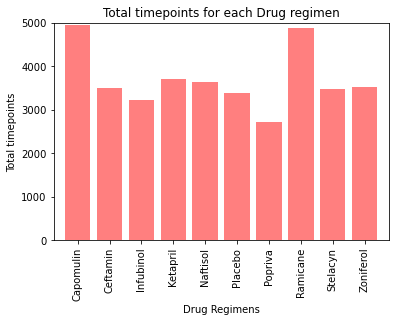

In [16]:
import numpy as np
import matplotlib.pyplot as plt

grouped_tumor_df["Drug Regimen"].sum()
timepoints = [4960, 3515, 3235, 3705, 3650, 3380, 2715, 4885, 3480, 3525]
x_axis = np.arange(len(timepoints))
plt.bar(x_axis, timepoints, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Popriva", "Ramicane", "Stelacyn", "Zoniferol"], rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
# Sets the y limits of the current chart
plt.ylim(0, 5000)

plt.title("Total timepoints for each Drug regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Total timepoints")

([<matplotlib.patches.Wedge at 0x22039dbac10>,
 [Text(-0.7230187918402546, -0.8290017048509964, 'Female'),
  Text(0.7230187918402547, 0.8290017048509963, 'Male')],
 [Text(-0.39437388645832067, -0.4521827481005435, '49.4%'),
  Text(0.3943738864583208, 0.4521827481005434, '50.6%')])

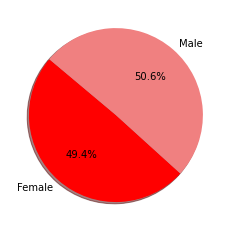

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Panda
grouped_sex_df=combined_data_df.groupby(['Sex'])
grouped_sex_df.count()

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [935, 958]

# The colors of each section of the pie chart
colors = ["red", "lightcoral"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_tumor_volume_df=combined_data_df.groupby(['Drug Regimen'])
final_tumor_volume_df
final_tumor_volume_df.count().head(15)

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [32]:
# Start by getting the last (greatest) timepoint for each mouse
regimen_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimen_df=combined_data_df[combined_data_df["Drug Regimen"].isin(regimen_list)]
regimen_df=regimen_df.sort_values(by=["Mouse ID", "Timepoint"])
regimen_df=regimen_df.drop_duplicates(subset=["Mouse ID"], keep="last")
regimen_df.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
327,a411,Ramicane,Male,3,22,45,38.407618,1
430,a444,Ramicane,Female,10,25,45,43.047543,0


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
 for treatments in treatments   
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

IndentationError: unexpected indent (<ipython-input-35-4c863e386376>, line 12)

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume')

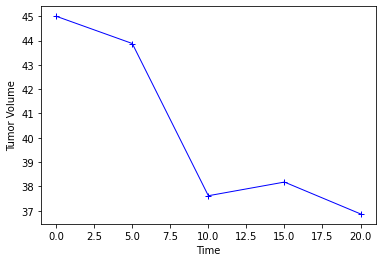

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#get data for one mouse with Capomulin
#x axis = time, y axis = volume
import numpy as np
import matplotlib.pyplot as plt
x_axis =np.arange(0,25,5)
x_axis
y_axis = (46, 36, -2)
y_axis

vol_pts = ([45.000000, 43.878496, 37.614948, 38.177232, 36.866876])

volume, = plt.plot(x_axis, vol_pts, marker="+",color="blue", linewidth=1, label="Tumor Volume")
plt.xlabel("Time")
plt.ylabel("Tumor Volume")


In [59]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

import matplotlib.pyplot as plt
import numpy as np

mouse_weight_df=combined_data_df.sort_values(by=["Mouse ID", "Weight (g)"])
mouse_weight_df=combined_data_df.drop_duplicates(subset=["Weight (g)"], keep="last")
mouse_weight_df.head()

avg_tumor_volume_df= regimen_df.sort_values(by=["Mouse ID", "Tumor Volume (mm3)"])
avg_tumor_volume_df = regimen_df."Tumor Volume (mm3)".average(["Tumor Volume (mm3)"])
avg_tumor_volume_df.head()




SyntaxError: invalid syntax (<ipython-input-59-876c0055f315>, line 11)

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
